## Importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

## Data Collection and Processing

In [2]:
df = pd.read_csv("Loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
df.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP002990,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [7]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.dropna(inplace = True)

In [10]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
col = ['CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
for i in df[col]:
    df[i] = df[i].astype('int')

In [12]:
df.dtypes

Loan_ID              object
Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
ApplicantIncome       int64
CoapplicantIncome     int64
LoanAmount            int64
Loan_Amount_Term      int64
Credit_History        int64
Property_Area        object
Loan_Status          object
dtype: object

In [13]:
le = LabelEncoder()
df['Loan_Status'] = le.fit_transform(df[['Loan_Status']])
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196,267,360,1,Urban,1


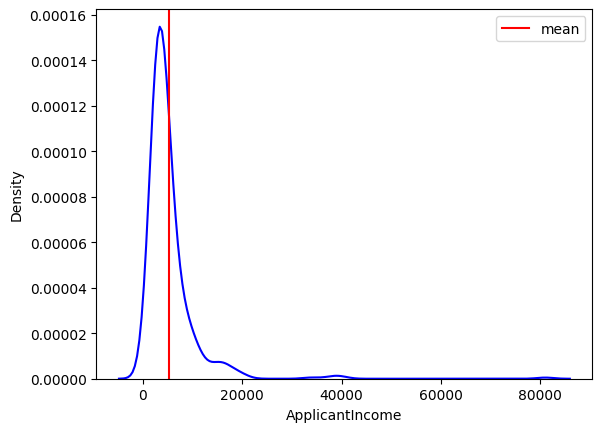

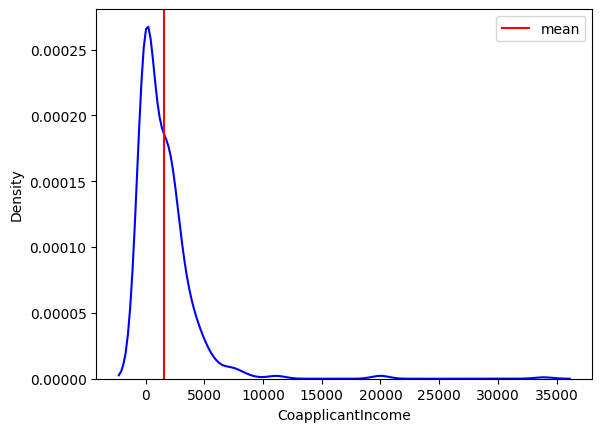

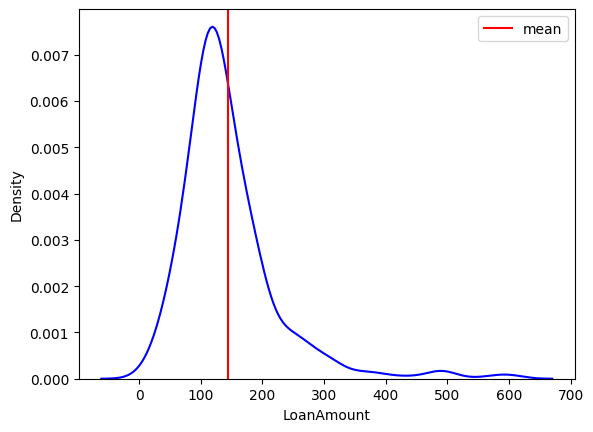

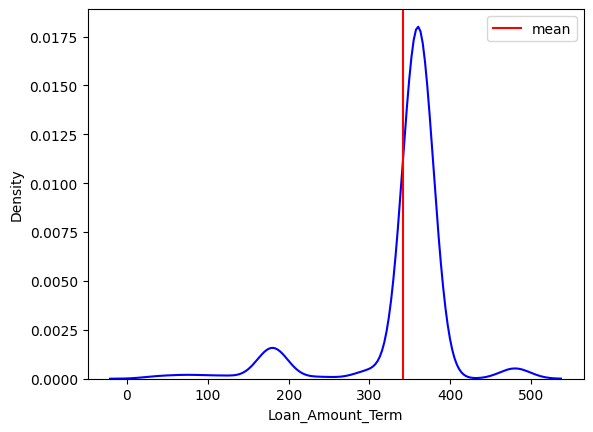

In [14]:
col = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term']
for i in df[col]:
    sns.kdeplot(df[i],color='b')
    plt.axvline(df[i].mean(),label="mean",color='r')
    plt.legend()
    plt.show()

In [15]:
df['Dependents'].value_counts()

Dependents
0     274
2      85
1      80
3+     41
Name: count, dtype: int64

In [16]:
df = df.replace(to_replace='3+',value=4)

In [17]:
df['Dependents'].value_counts()

Dependents
0    274
2     85
1     80
4     41
Name: count, dtype: int64

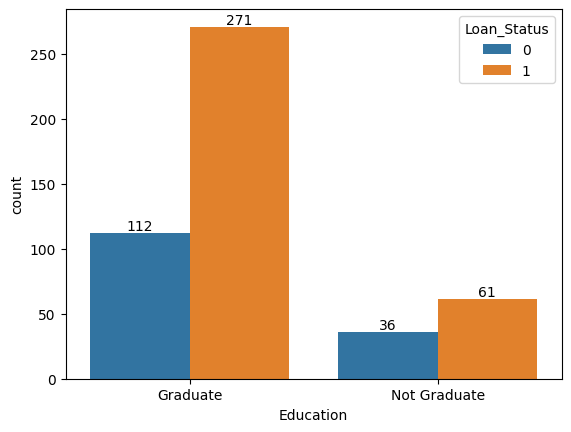

In [18]:
ax = sns.countplot(x='Education',data=df,hue='Loan_Status')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

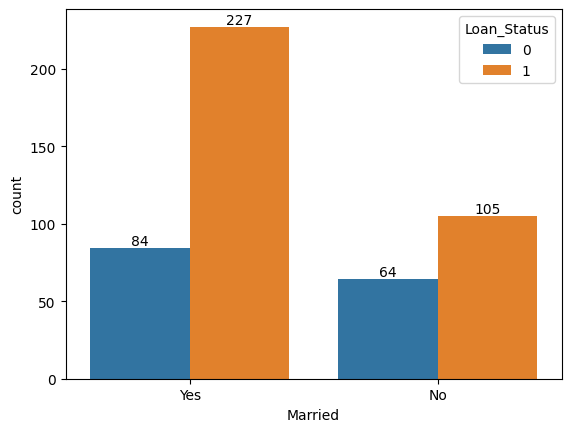

In [19]:
ax = sns.countplot(x='Married',data=df,hue='Loan_Status')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

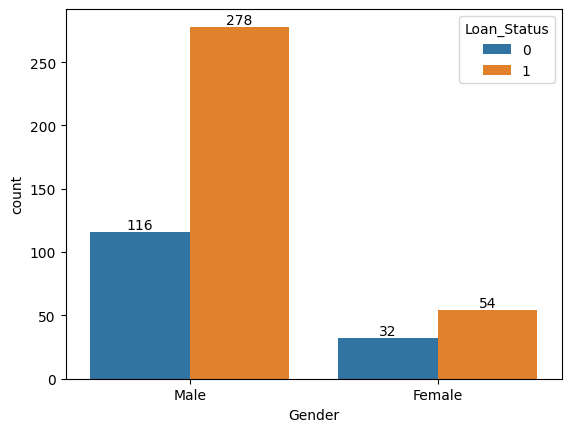

In [20]:
ax = sns.countplot(x='Gender',data=df,hue='Loan_Status')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

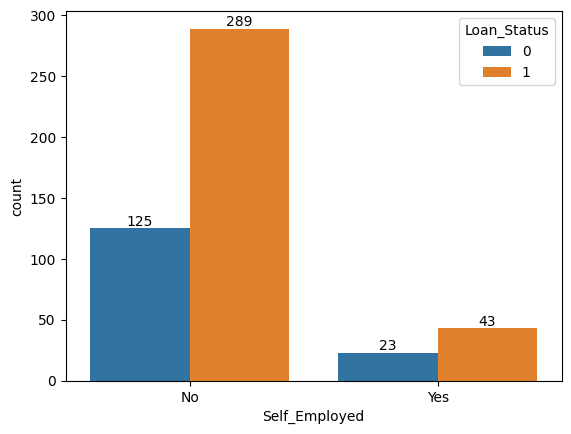

In [21]:
ax = sns.countplot(x='Self_Employed',data=df,hue='Loan_Status')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

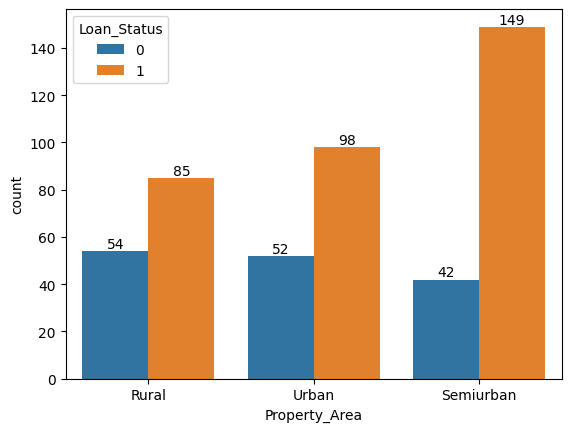

In [22]:
ax = sns.countplot(x='Property_Area',data=df,hue='Loan_Status')
for i in ax.containers:
    ax.bar_label(i)
plt.show()

In [23]:
X = df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y = df['Loan_Status']

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [25]:
lr = LogisticRegression()
rf = RandomForestClassifier()
kn = KNeighborsClassifier()
svc = SVC()

In [26]:
estimators = [('Logistic',lr),('RandomForest',rf),('KNN',kn),('SVC',svc)]

In [27]:
numeric_features = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']
categorcal_features = ['Gender','Married','Education','Self_Employed','Property_Area']

In [28]:
numeric_trans = Pipeline(steps=[
    ('scale',StandardScaler())
])

In [29]:
categorical_trans = Pipeline(steps=[
    ('ohe',OneHotEncoder(handle_unknown='ignore'))
])

In [30]:
preprocess = ColumnTransformer(transformers=[
    ('numeric',numeric_trans,numeric_features),
    ('categorical',categorical_trans,categorcal_features)
])

In [31]:
pipe = Pipeline(steps=[
    ('process',preprocess),
    ('model',RandomForestClassifier())
])

In [32]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('process',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Property_Area'])])),
                ('model', RandomForestClassifier())])

In [33]:
y_pred = pipe.predict(X_test)
accuracy_score(y_test,y_pred)

0.7916666666666666

In [34]:
x = cross_val_score(pipe,X,y,cv=5,scoring='accuracy')
print(np.mean(x))

0.7812500000000001


## check accuracy from all model

In [35]:

for estimator in estimators:
    pipe = Pipeline(steps=[
    ('process',preprocess),
    ('model',estimator[1])
    ])
    pipe.fit(X_train,y_train)
    y_pred = pipe.predict(X_test)
    print(estimator[0],accuracy_score(y_test,y_pred)*100)

Logistic 81.25
RandomForest 75.0
KNN 77.08333333333334
SVC 81.25


## check real score from all model

In [36]:

df = df.replace(
    {'Married':{'No':0,'Yes':1},
    'Gender':{'Male':1,'Female':0},
    'Self_Employed':{'No':0,'Yes':1},
    'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},
    'Education':{'Graduate':1,'Not Graduate':0}})

In [37]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508,128,360,1,0,0
2,LP001005,1,1,0,1,1,3000,0,66,360,1,2,1
3,LP001006,1,1,0,0,0,2583,2358,120,360,1,2,1
4,LP001008,1,0,0,1,0,6000,0,141,360,1,2,1
5,LP001011,1,1,2,1,1,5417,4196,267,360,1,2,1


In [38]:
X = df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y = df['Loan_Status']

In [39]:
for esti in estimators:
    x = cross_val_score(esti[1],X,y,cv=5,scoring='accuracy')
    print(esti[0],np.round(np.mean(x),2))

Logistic 0.79
RandomForest 0.79
KNN 0.65
SVC 0.69


## Hyperparameter Tuning

In [40]:
param_grid = {
    'n_estimators':[20,60,100,120],     # Number of tree in random forest
    'max_features':[0.2,0.6,1.0],       # Number of features to consider at every split
    'max_depth':[2,8,None],             # Maximum no.of levels in tree
    'max_samples':[0.5,0.75,1.0]        # Number of samples
}

In [41]:
rf_grid = GridSearchCV(estimator = rf,
                       param_grid = param_grid,
                       cv = 5,
                       verbose = 2,
                       n_jobs = -1
)

In [42]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,1,0,4583,1508,128,360,1,0,0
2,LP001005,1,1,0,1,1,3000,0,66,360,1,2,1
3,LP001006,1,1,0,0,0,2583,2358,120,360,1,2,1
4,LP001008,1,0,0,1,0,6000,0,141,360,1,2,1
5,LP001011,1,1,2,1,1,5417,4196,267,360,1,2,1


In [43]:
X = df.drop(columns=['Loan_ID','Loan_Status'],axis=1)
y = df['Loan_Status']

In [44]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=42)

In [46]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [47]:
rf_grid.best_score_

np.float64(0.8101309810211174)

In [48]:
rf_grid.best_params_

{'max_depth': None,
 'max_features': 0.2,
 'max_samples': 1.0,
 'n_estimators': 120}

## finally we take random forest model

In [49]:
pipe = Pipeline(steps=[
    ('process',preprocess),
    ('model',RandomForestClassifier(max_depth=2, max_features=0.6, max_samples= 0.5, n_estimators=60))
])

In [50]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('process',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['ApplicantIncome',
                                                   'CoapplicantIncome',
                                                   'LoanAmount',
                                                   'Loan_Amount_Term',
                                                   'Credit_History']),
                                                 ('categorical',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Married',
                                                   'Education', 'Self_Employed',
                                                   'Property_Area'])])),
                ('model',
                 RandomForestClassifier(max_depth=2, max_features=0.6,
                                        max_samples=0.5, n_estimators=60))])

In [51]:
y_pred = pipe.predict(X_test)
accuracy_score(y_test,y_pred)

0.8125

In [52]:
input_data = ['Male', 'Yes', 0, 'Graduate', 'No', 4583, 1508, 128, 360, 1, 'Urban']
# Make sure column names match what your pipeline expects
columns = [
    'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
    'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',
    'Credit_History', 'Property_Area'
]

input_df = pd.DataFrame([input_data], columns=columns)
result = pipe.predict(input_df)
print(result)

[1]


In [ ]:
if result[0] == 1:
    print('Yes')
else:
    print('No')

In [ ]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))